In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

AttributeError: module 'inspect' has no attribute 'ArgSpec'

In [ ]:
!git clone https://github.com/DariusAf/MesoNet.git

fatal: destination path 'MesoNet' already exists and is not an empty directory.


In [ ]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [ ]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [ ]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'], image_dimensions['width'], image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [ ]:

class MesoInception4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def Inception_Layer(self,a,b,c,d): 
        def func(x):
            x1= Conv2D(a,(1,1), padding='same', activation='relu')(x)

            x2= Conv2D(b,(1,1), padding='same', activation='relu')(x)
            x2= Conv2D(b,(3,3), padding='same', activation='relu')(x2)
            
            x3= Conv2D(c,(1,1), padding='same', activation='relu')(x)
            x3= Conv2D(c,(3,3), dilation_rate=2, strides=1, padding='same', activation='relu')(x3)
           
            x4= Conv2D(d,(1,1), padding='same', activation='relu')(x)
            x4= Conv2D(d,(3,3), dilation_rate=3, strides=1, padding='same', activation='relu')(4)
            
            y= Concatenate(axis=-1)([x1,x2,x3,x4])
            return y
        return func

    def init_model(self): 
        x = Input(shape = (image_dimensions['height'], image_dimensions['width'], image_dimensions['channels']))
    
        x1 = self.Inception_Layer(1,4,4,2)(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = self.Inception_Layer(2,4,4,2)(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [ ]:
import random
from os import listdir
from os.path import isfile,join
import numpy as np
from math import floor
from scipy.ndimage.interpolation import zoom, rotate
import imageio
# import face_recognition



C:\Users\HP\AppData\Local\Temp\ipykernel_5516\987315548.py:6: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import zoom, rotate
C:\Users\HP\AppData\Local\Temp\ipykernel_5516\987315548.py:6: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import zoom, rotate


ModuleNotFoundError: No module named 'face_recognition'

In [ ]:
class Video:
    def __init__(self, path):
        self.path= path
        self.container= imageio.get_reader(path,'ffmpeg')
        self.length=self.container.count_frames()
        self.fps=self.container.get_meta_data()['fps']
    def init_head(self):
        self.container.set_image_index(0)
    def next_frame(self):
        self.container.get_next_data()
    def get(self,key):
        return self.container.get_data(key)
    def __call__(self, key):
        return self.get(key)
    def __len__(self):
        return self.length
    
class faceFinder(Video):
    def __init__(self, path, load_first_face =True):
        super().__init__(path)
        self.faces={}
        self.coordinates={} # stores the face (locations center, rotation, length)
        self.last_frame = self.get(0)
        self.frame_shape = self.last_frame.shape[:2]
        self.last_location = (0, 200, 200, 0)

        if (load_first_face):
            face_positions = face_recognition.face_locations(self.last_frame, number_of_times_to_upsample=2)
            if len(face_positions) > 0:
                self.last_location = face_positions[0]

def load_coordinates(self, filename):
    np_coords = np.load(filename)
    self.coordinates = np_coords.item()

def expand_location_zone(self, loc, margin= 0.2): #***Adds a margin around a frame slice
    offset = round(margin * (loc[2] - loc[0]))

    y0= max(loc[0]- offset, 0)

    x1= min(loc[1]+ offset, self.frame_shape[1])

    y1= min(loc[2]+ offset, self.frame_shape[0])

    x0= max(loc[3] - offset, 0)

    return (y0, x1, y1, x0)

@staticmethod

def upsample_location(reduced_location, upsampled_origin, factor):

# ***Adapt a location to an upsampled image slice

    y0, x1, y1, x0 = reduced_location 
    y0= round(upsampled_origin[0]+ y0* factor)
    x1= round(upsampled_origin[1]+ x1* factor)
    y1= round(upsampled_origin[0]+ y1* factor)
    x0= round(upsampled_origin[1]+ x0* factor)

    return (y0,x1,y1,x0)


@staticmethod

def pop_largest_location(location_list):
    max_location = location_list[0]
    max_size=0
    if len(location_list) > 1:
        for location in location_list:
            size = location[2] - location[0]
            if size > max_size:
                max_size=size
                max_location = location

    return max_location

@staticmethod

def L2(A, B):
    return np.sqrt(np.sum(np.square(A - B)))

def find_coordinates(self, landmark, K-2.2):

# We either choose K distance(eyes, mouth), or, if the head is tilted, K distance(eye 1, eye 2) landmarks coordinates are in (x,y) not (y,x)

    E1= np.mean(landmark['left_eye'], axis=0)
    E2= np.mean(landmark['right_eye'], axis=0)
    E = (E1 + E2) / 2
    N= np.mean(landmark['nose tip'], axis=0) /2+ np.mean(landmark['nose bridge'], axis=0) / 2
    B1= np.mean(landmark['top lip'], axis=0)
    B2= np.mean(landmark['bottom lip'], axis=0)

    B= (B1 + B2) / 2

    C= N 
    l1= self.L2(E1, E2) 
    l2= self.L2(B, E)
    l= max(l1, l2) * K
    if (B[1] ==E[1]):
        if(B[0] > E[0]):
            rot= 90
        else:
            rot=-90

    else:
        rot= np.arctan((B[0] - E[0]) / (B[1]- E[1])) / np.pi* 180

    return ((floor(C[1]), floor(C[0])), floor(1), rot)

def find_faces(self, resize= 8.5, stop=0, skipstep=0, no_face_acceleration_threshold =3, cut_left=0, cut_right=-1, use_frameset= False, frameset=[]):


    # The core function to extract faces, from frames using previous frame location and downsampling to accelerate the loop.
    not_found =0

    no_face = 0

    no_face_acc=0

    # to only deal with a subset of a video, for instance I-frames only

    if (use_frameset):
        finder_frameset= frameset
    else:
        if (stop!=0):
            finder_frameset=range(0,min(self.length, stop), skipstep+1)
        else:
            finder_frameset=range(0,self.length, skipstep+1)
    for i in finder_frameset:
        frame=self.get(i)
        if (cut_left !=0 or cut_right != -1):
            frame[:,:cut_left]=0
            frame[:,cut_right:]=0
        potential_location= self.expand_location_zone(self.last_location)
        potential_face_patch= frame[potential_location[0]:potential_location[2],potential_location[3]:potential_location[1]]
        potential_face_patch_origin= (potential_location[0],potential_location[3])
        reduced_potential_face_patch= zoom(potential_face_patch,(resize,resize,1))
        reduced_face_locations= face_recognition.face_locations(reduced_potential_face_patch,model='cnn')
        if len(reduced_face_locations)>0:
            no_face_acc=0
            reduced_face_locations=self.pop_largest_location(reduced_face_locations)            
            face_location = self.upsample_location(reduced_face_location, potential_face_patch_origin, 1/resize)
            self.faces[i]= face_location
            self.last_location =face_location
            #extract face rotation, length and center from anark
            landmarks= face_recognition.face_landmarks(frame, [face_location])
            if len(landmarks) > 0:
                self.coordinates[i]= self.find_coordinates(landmarks[0])
        else:
            not_found += 1
            if no_face_acc < no_face_acceleration_threshold:
                face_locations = face_recognition.face_locations(frame, numbe_of_times_to_upsample = 2)

            else:
                reduced_frame = zoom (frame, (resize, resize, 1))
                face_locations= face_recognition.face_locations(reduced_frame)

            if len(face_locations) > 0:
                print('Face extraction warning: ', i, '- found face in full frame', face_locations)
                no_face_acc=0 #reset the no_face_acceleration mode accumulator
                face_location= self.pop_largest_location(face_locations)
                # If was found on a reduced frame, upsample location
                if no_face_acc > no_face_acceleration_threshold:
                    face_location= self.upsample_location(face_location, (0, 0), 1/resize)
                    self.faces[i]= face_location
                    self.last_location = face_location
                    landmarks= face_recognition.face_landmarks(frame, [face location])
                    if len(landmarks) > 0:
                        self.coordinates[i]=self.find_coordinates(landmarks[0])
                else:
                    print('Face extraction warning :  ',i, '-no face')
                    no_face_acc += 1
                    no_face += 1
    print('Face extraction report of', 'not_found: ', not_found)
    print('Face extraction report of', 'no face: ', no_face)
    return 0
def get_face(self, i):
    # Basic unused face extraction without alignment
    frame=self.get(i)
    if i in self.faces:
        loc= self.faces[i]
        patch= frame[loc[0]:loc[2], loc[3]:loc[1]]
        return patch
    return frame

@staticmethod
def get_image_slice(img, y0, y1, x0, x1):
    # Get values outside the domain of an image
    m, n = img.shape[:2]
    padding= max(-y0, y1-m, -x0, x1-n, 0)
    padded_img= np.pad(img, ((padding, padding), (padding, padding), (0, 0)), 'reflect') 
    return padded_img[(padding + y0): (padding+ y1), (padding+ x0): (padding+ x1)]
def get_aligned_face(self, i, l_factor-1.3):
    frame=self.get(i)
    if i in self.coordinates:
        c, l, r= self.coordinates[i]
        l= int(l) * l_factor #fine tuning the face zoom we really want 
        dl_ = floor(np.sqrt(2)* l /2) #largest zone even when rotated
        patch= self.get_image_slice(frame, floor(c[0]- dl_),floor(c[0]+ dl_), floor(c[1]- dl_), floor(c[1]+ dl_)) 
        rotated_patch= rotate(patch, -r, reshape=False) #note di is the center of the patch of length 2dl 
        return self.get_image_slice(rotated_patch, floor(dl_-l //2), floor(dl_ +l//2), floor(dl_-l//2), floor(dl_ +l//2))
    return frame

#  Face prediction
class FaceBatchGenerator:

# Have to deal with framesubsets of video.
    def __init__(self, face_finder, target_size= 256):
        self.finder= face_finder
        self.target_size= target_size 
        self.head= 0
        self.length= int(face_finder.length)

    def resize_patch(self,patch):
        m,n = patch.shape[:2]
        return zoom(patch, (self.target_size/m, self.target_size/n, 1))
    def next_batch(self, batch_size=50):
        batch=np.zeros((1,self.target_size, self.target_size,3))
        batch=np.concatenate((batch,np.expand_dims(self.resize_patch(patch), axis=0)), axis=0)
        i += 1
        



In [ ]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('https://tfhub.dev/google/tf2-preview-mobilenet_v2_100_224/classification/4')

ValueError: Unsuccessful TensorSliceReader constructor: Failed to get matching files on https://tfhub.dev/google/tf2-preview-mobilenet_v2_100_224/classification/4: UNIMPLEMENTED: File system scheme 'https' not implemented (file: 'https://tfhub.dev/google/tf2-preview-mobilenet_v2_100_224/classification/4')

In [ ]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


In [ ]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [ ]:
# '.ipynb_checkpoints' is a *hidden* file Jupyter creates for autosaves
# It must be removed for flow_from_directory to work.
!rmdir /s /q c:data\.ipynb_checkpoints

# Equivalent command in Unix (for Mac / Linux users)
# !rm -r /Users/mikhaillenko/mesonet/mesonet/data/.ipynb_checkpoints/

The system cannot find the file specified.


In [ ]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')
# Re-checking class assignment after removing it
generator.class_indices

Found 7104 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

1/1 [==============================] - 0s 265ms/step
0.017821817
1/1 [==============================] - 0s 25ms/step
Predicted likelihood: 0.0178
Actual label: 0
1/1 [==============================] - 0s 25ms/step

Correct prediction: True


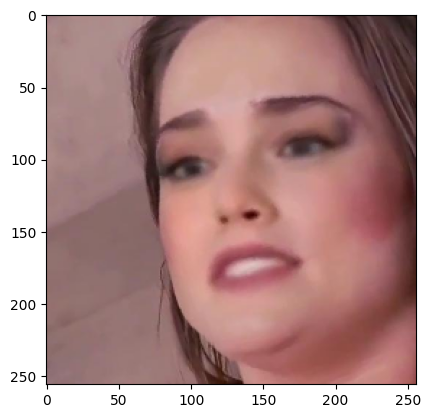

In [ ]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(meso.predict(X)[0][0])
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));
# print(y)

In [ ]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [ ]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

1/1 [==============================] - 0s 29ms/step
0  predictions completed.
1/1 [==============================] - 0s 23ms/step
1000  predictions completed.
1/1 [==============================] - 0s 24ms/step
2000  predictions completed.
1/1 [==============================] - 0s 24ms/step
3000  predictions completed.
1/1 [==============================] - 0s 30ms/step
4000  predictions completed.
1/1 [==============================] - 0s 28ms/step
5000  predictions completed.
1/1 [==============================] - 0s 31ms/step
6000  predictions completed.
1/1 [==============================] - 0s 44ms/step
7000  predictions completed.
1/1 [==============================] - 0s 45ms/step
All 7104 predictions completed


In [ ]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 4)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

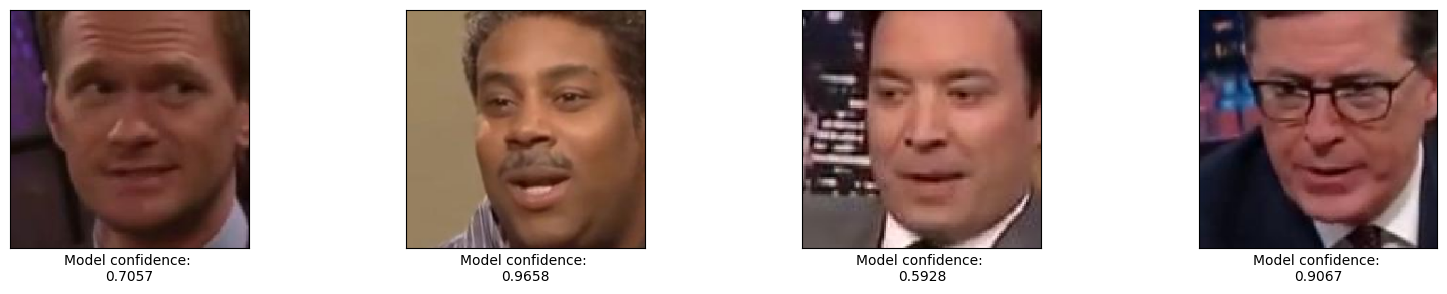

In [ ]:
plotter(correct_real, correct_real_pred)

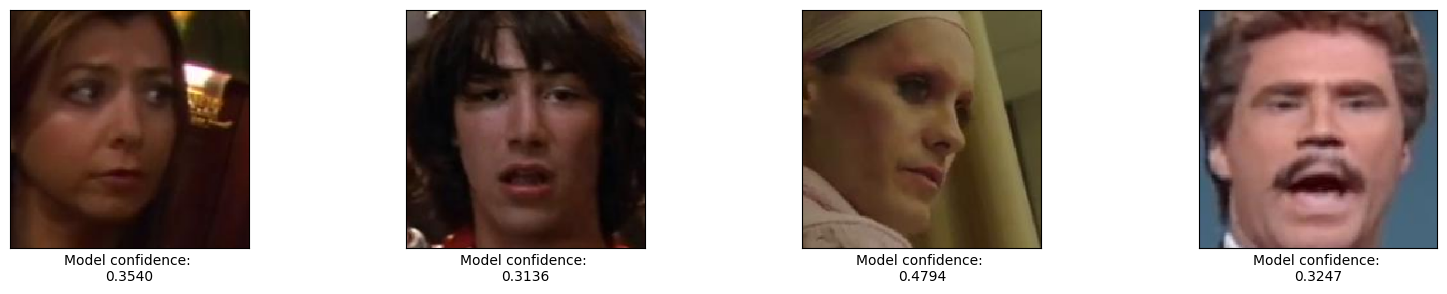

In [ ]:
plotter(misclassified_real, misclassified_real_pred)

In [ ]:
# plotter(correct_deepfake, correct_deepfake_pred)

In [ ]:
# plotter(misclassified_deepfake, misclassified_deepfake_pred)

1/1 [==============================] - 0s 38ms/step
Predicted value: 1.0000


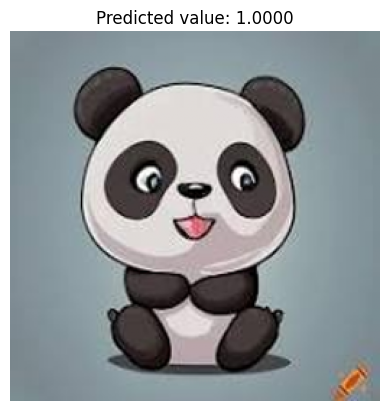

In [ ]:


from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


image_path = './p.jpg'
img = Image.open(image_path)

# Resize the image to match the input shape expected by the model
img = img.resize((256, 256))

# Convert the image to a numpy array and scale pixel values
img_array = np.array(img) / 255.0

# Add an extra dimension to match the model's input shape (1, 256, 256, 3)
img_array = np.expand_dims(img_array, axis=0)

# Predict the label for the single image
prediction = meso.predict(img_array)

# Access the prediction value
predicted_value = prediction[0][0]
print(f"Predicted value: {predicted_value:.4f}")

# Display the image with its prediction
plt.imshow(np.squeeze(img_array))
plt.title(f"Predicted value: {predicted_value:.4f}")
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:

import cv2
import numpy as np

cap = cv2.VideoCapture('./j.gif')
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)
real_count = 0
fake_count = 0

while cap.isOpened():
    for i in range (frame_count):
        ret, frame = cap.read()
       
        if ret:
            frame = cv2.resize(frame,(256,256))
            # frame = np.array(frame) / 255.0
            frame = frame.astype('float32') / 255.0  # Normalize the frame
            frame = np.expand_dims(frame, axis=0)
            prediction = meso.predict(frame)[0][0]
            print(f"Predicted value: {prediction:.4f}")

            if round(prediction) < 0.5:
                fake_count = fake_count + 1
            else:
                real_count = real_count + 1
                
            print(f'Frame: {cap.get(cv2.CAP_PROP_POS_FRAMES)}, Prediction: {"Fake" if round(prediction) < 0.5 else "Real"}, Confidence: {prediction:.4f}')
            
    break
cap.release()
cv2.destroyAllWindows()

# Summary of predictions
total_frames = real_count + fake_count

print(f'Total frames: {total_frames}')
print(f'Real frames: {real_count} ({(real_count / total_frames) * 100:.2f}%)')
print(f'Fake frames: {fake_count} ({(fake_count / total_frames) * 100:.2f}%)')

# Determine overall video prediction
if fake_count > real_count:
    print('The video is predicted to be a Deepfake.')
else:
    print('The video is predicted to be Real.')



67
1/1 [==============================] - 0s 41ms/step
Predicted value: 0.7320
Frame: 1.0, Prediction: Real, Confidence: 0.7320
1/1 [==============================] - 0s 41ms/step
Predicted value: 0.7306
Frame: 2.0, Prediction: Real, Confidence: 0.7306
1/1 [==============================] - 0s 37ms/step
Predicted value: 0.8260
Frame: 3.0, Prediction: Real, Confidence: 0.8260
1/1 [==============================] - 0s 40ms/step
Predicted value: 0.8349
Frame: 4.0, Prediction: Real, Confidence: 0.8349
1/1 [==============================] - 0s 42ms/step
Predicted value: 0.5841
Frame: 5.0, Prediction: Real, Confidence: 0.5841
1/1 [==============================] - 0s 44ms/step
Predicted value: 0.5813
Frame: 6.0, Prediction: Real, Confidence: 0.5813
1/1 [==============================] - 0s 40ms/step
Predicted value: 0.4079
Frame: 7.0, Prediction: Fake, Confidence: 0.4079
1/1 [==============================] - 0s 40ms/step
Predicted value: 0.4160
Frame: 8.0, Prediction: Fake, Confidence: 0.41

In [ ]:

print(True & True)
print(True and True)
x=5

def p(a=8,b=9):
    
    print(x)
    c=a+b
    print(a+b)
    return 

p(0,3)
print(c)

True
True
5
3


NameError: name 'c' is not defined

In [ ]:

import cv2
import numpy as np

def predict_frame(frame):
    frame = cv2.resize(frame,(256,256))
    frame = np.array(frame) / 255.0
    # frame = frame.astype('float32') / 255.0  # Normalize the frame
    frame = np.expand_dims(frame, axis=0)
    prediction = meso.predict(frame)[0][0]
    return prediction

# './Testvideo.mp4'
cap = cv2.VideoCapture('./j.gif')
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)
real_count = 0
fake_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    # if not ret:
    #     print("Hiiii")
    #     break
    if ret:    
        prediction = predict_frame(frame)
            
        if prediction > 0.5:
            real_count = real_count + 1
            print("Hii")
        else:
            fake_count = fake_count + 1
            print("Hola")
            
        print(f'Frame: {cap.get(cv2.CAP_PROP_POS_FRAMES)}, Prediction: {"Real" if prediction > 0.5 else "Fake"}, Confidence: {prediction:.4f}')
        if (cv2.waitKey(1) & 0xff==ord('m')):
            break
    # cap.release()
    # cv2.destroyAllWindows()
    cap.release()
    cv2.waitKey(5000)
    cv2.destroyAllWindows()
print(real_count)
print(fake_count)
# Summary of predictions
# total_frames = real_count + fake_count
# real_percentage = (real_count / total_frames) * 100
# fake_percentage = (fake_count / total_frames) * 100

# print(f'Total frames: {total_frames}')
# print(f'Real frames: {real_count} ({real_percentage:.2f}%)')
# print(f'Fake frames: {fake_count} ({fake_percentage:.2f}%)')

# Determine overall video prediction
if fake_count > real_count:
    print('The video is predicted to be a Deepfake.')
else:
    print('The video is predicted to be Real.')

